# Practice Exercise - Linear Regression

### Problem Statement

The problem at hand is to predict the housing prices of a town or a suburb based on the features of the locality provided to us. In the process, we need to identify the most important features in the dataset. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for us.

### Data Information

Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below-

Attribute Information (in order):
- CRIM: per capita crime rate by town
- ZN: proportion of residential land zoned for lots over 25,000 sq. ft.
- INDUS: proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: nitric oxides concentration (parts per 10 million)
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940
- DIS: weighted distances to five Boston employment centers
- RAD: index of accessibility to radial highways
- TAX: full-value property-tax rate per 10,000 dollars
- PTRATIO: pupil-teacher ratio by town
- LSTAT: %lower status of the population
- MEDV: Median value of owner-occupied homes in 1000 dollars.

### Import Necessary Libraries

In [2]:
# this will help in making the Python code more structured automatically (good coding practice)
# %load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_squared_error

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/Othercomputers/My Mac/My Drive (tibsonk@gmail.com)/School/UT_Austin/Machine_Learning/Week 1_Linear Regression/insurance.csv')

### Load the dataset

In [6]:
df = pd.read_csv('/content/drive/Othercomputers/My Mac/My Drive (tibsonk@gmail.com)/School/UT_Austin/Machine_Learning/Week 1_Linear Regression/insurance.csv')

### Check the shape of the dataset

In [7]:
df.shape

(1338, 7)

### Get the info regarding column datatypes

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Get summary statistics for the numerical columns

In [9]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Exploratory Data Analysis

**Plot the distribution plots for all the numerical features and list your observations.**

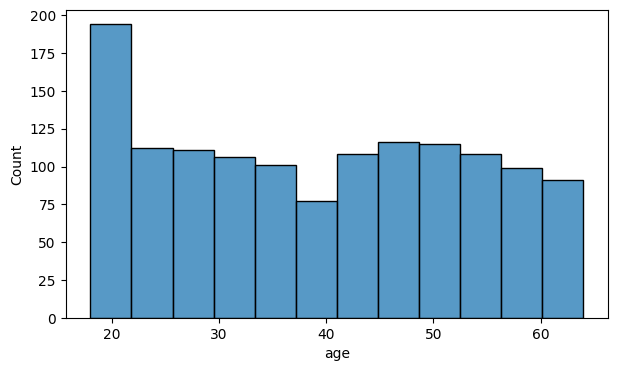

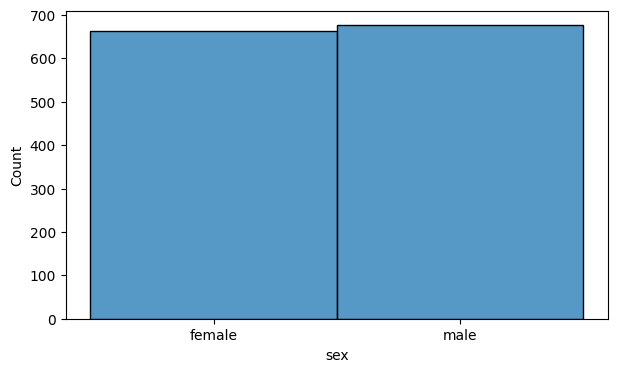

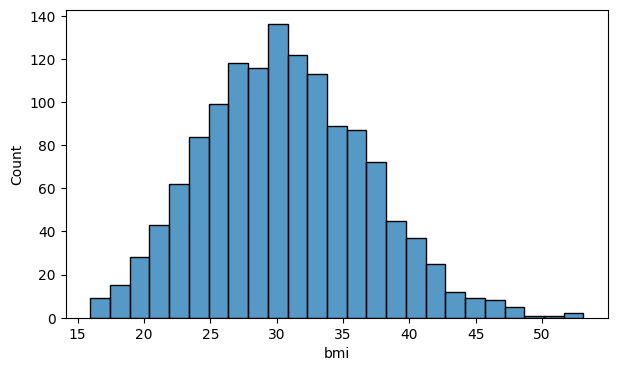

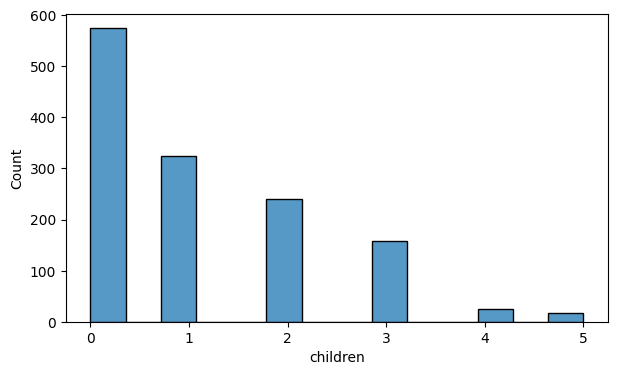

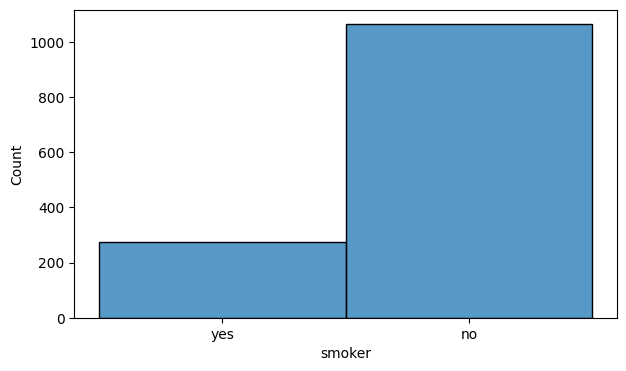

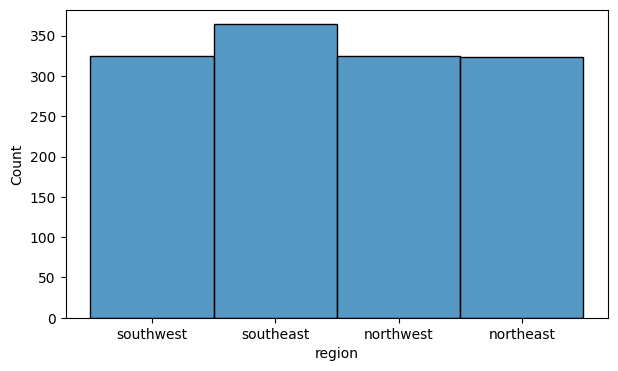

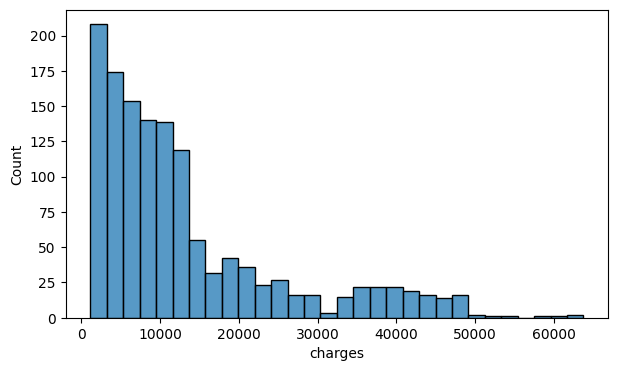

In [10]:
# let's plot all the columns to look at their distributions

import seaborn as sns

for i in df.columns:
    plt.figure(figsize=(7, 4))
    sns.histplot(data=df, x=i)
    plt.show()

* CRIM and ZN have heavily skewed distributions.
* RM and MEDV have close to normal distributions.

**Plot the scatterplots for features and the target variable `MEDV` and list your observations.**

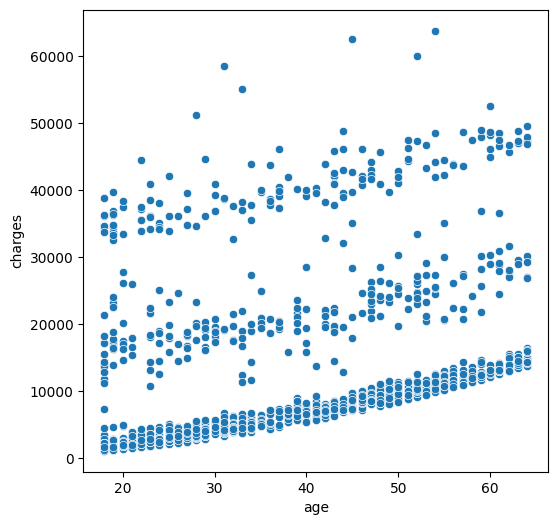

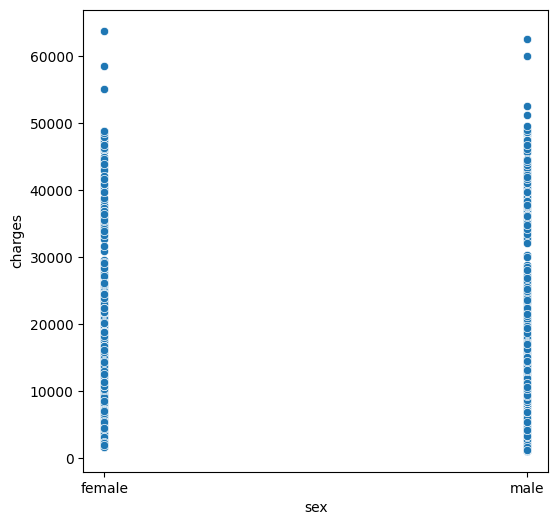

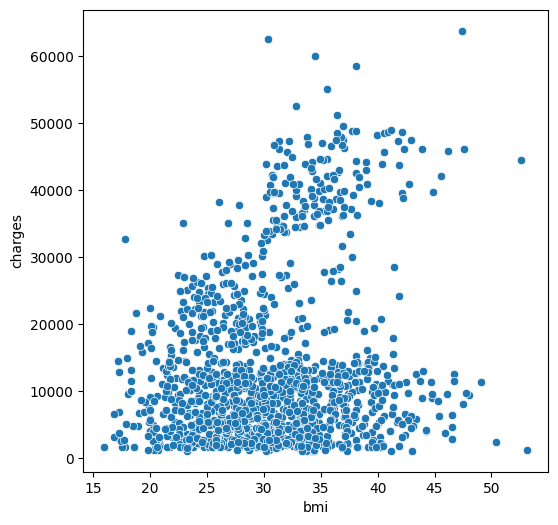

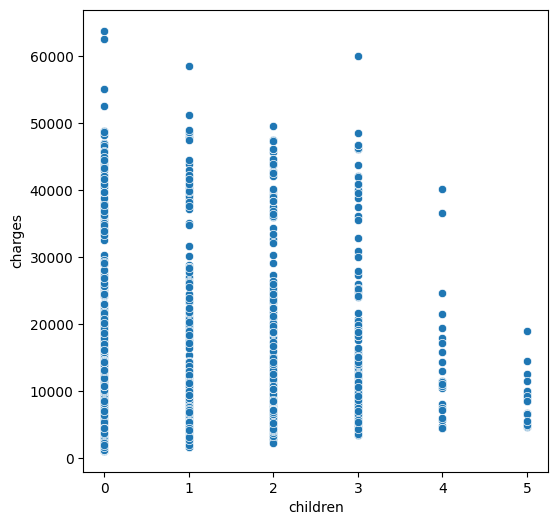

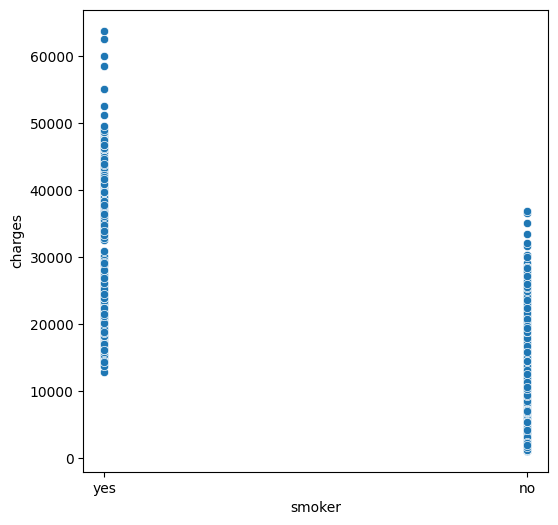

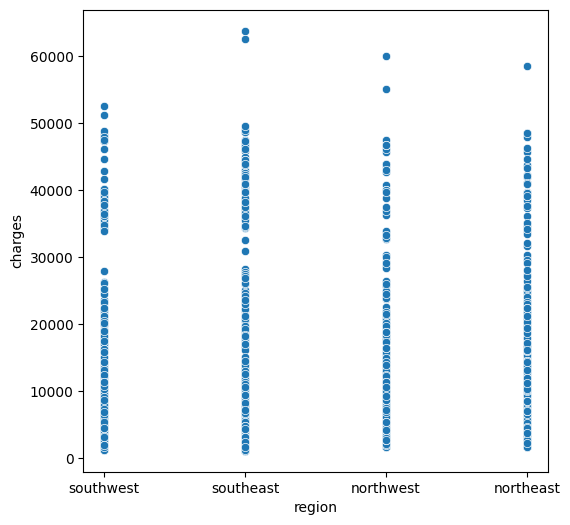

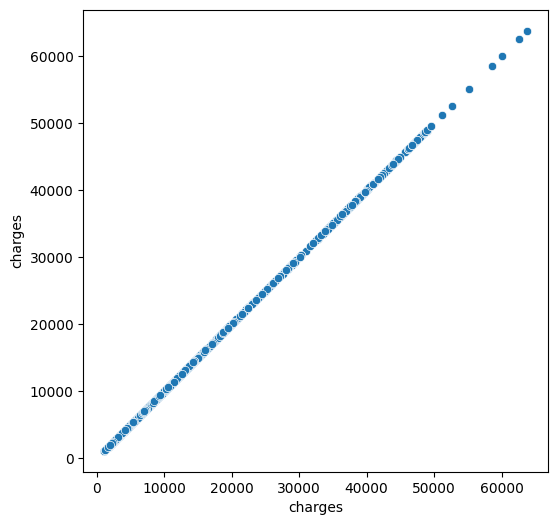

In [12]:
# let's plot the scatterplots of median price with all the features

for i in df.columns:
    plt.figure(figsize=(6, 6))
    sns.scatterplot(data=df, x=i, y="charges")
    plt.show()

* LSTAT and RM show a slightly strong linear relationship with MEDV.

**Plot the correlation heatmap and list your observations.**

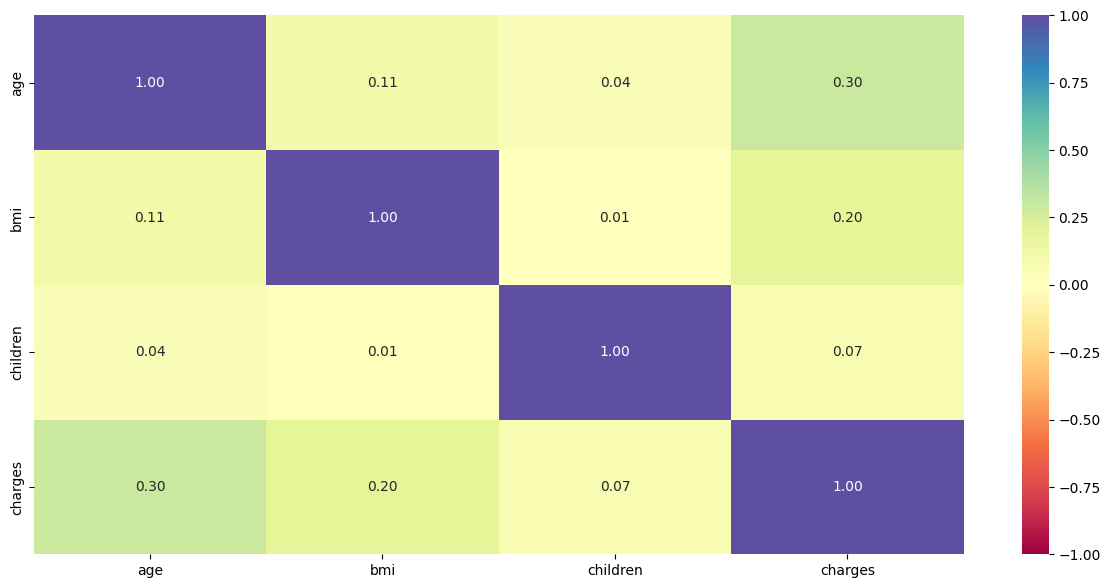

In [14]:
plt.figure(figsize=(15, 7))
numeric_df = df.select_dtypes(include=[np.number])  # Select numeric columns
sns.heatmap(numeric_df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

In [13]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

ValueError: could not convert string to float: 'female'

<Figure size 1500x700 with 0 Axes>

* NX and TAX show a slightly strong positive linear relationship with INDUS, while DIS shows a slightly strong negative linear relationship with INDUS.
* NX shows a slightly strong positive linear relationship with AGE, while DIS shows a slightly strong negative linear relationship with AGE.
* RM shows a slightly strong positive linear relationship with MEDV, while LSTAT shows a slightly strong negative linear relationship with MEDV.

### Split the dataset

Split the data into the dependent and independent variables, and further split it in a ratio of 70:30 for train and test sets.

In [15]:
X = df.drop("bmi", axis=1)
y = df["bmi"]

In [16]:
# splitting the data in 70:30 ratio for train to test data

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)

### Model Building (sklearn)

**Fit the model to the training set**

In [17]:
# intialize the model to be fit and fit the model on the train data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

ValueError: could not convert string to float: 'male'

**Get the score on training set**

In [ ]:
# get the score (R-squared) on the training set

print(
    "The score (R-squared) on the training set is ",
    regression_model.score(X_train, y_train),
)

The score (R-squared) on the training set is  0.7073732058856179


<IPython.core.display.Javascript object>

**Write your own function for the R-squared score.**

In [ ]:
def r_squared(model, X, y):
    y_mean = y.mean()
    SST = ((y - y_mean) ** 2).sum()
    SSE = ((y - model.predict(X)) ** 2).sum()
    r_square = 1 - SSE / SST
    return SSE, SST, r_square


SSE, SST, r_square = r_squared(regression_model, X_train, y_train)
print("SSE: ", SSE)
print("SST: ", SST)
print("R-squared: ", r_square)

SSE:  8410.365734587129
SST:  28740.928389830508
R-squared:  0.7073732058856179


<IPython.core.display.Javascript object>

**Get the score on test set**

In [ ]:
# get the score (R-squared) on the test set

print(
    "The score (R-squared) on the test set is ", regression_model.score(X_test, y_test)
)

The score (R-squared) on the test set is  0.7721684899134138


<IPython.core.display.Javascript object>

**Get the RMSE on train set**

In [ ]:
print(
    "The Root Mean Square Error (RMSE) of the model for the training set is ",
    np.sqrt(mean_squared_error(y_train, regression_model.predict(X_train))),
)

The Root Mean Square Error (RMSE) of the model for the training set is  4.874227661429436


<IPython.core.display.Javascript object>

**Get the RMSE on test set**

In [ ]:
print(
    "The Root Mean Square Error (RMSE) of the model for the test set is ",
    np.sqrt(mean_squared_error(y_test, regression_model.predict(X_test))),
)

The Root Mean Square Error (RMSE) of the model for the test set is  4.569658652745821


<IPython.core.display.Javascript object>

**Get the model coefficients.**

In [ ]:
# let's check the coefficients and intercept of the model

coef_df = pd.DataFrame(
    np.append(regression_model.coef_, regression_model.intercept_),
    index=X_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)

coef_df

,Coefficients
CRIM,-0.113845
ZN,0.061170
INDUS,0.054103
CHAS,2.517512
NX,-22.248502
RM,2.698413
AGE,0.004836
DIS,-1.534295
RAD,0.298833
TAX,-0.011414


<IPython.core.display.Javascript object>

**Automate the equation of the fit**

In [ ]:
# Let us write the equation of linear regression

Equation = "Price = " + str(regression_model.intercept_)
print(Equation, end=" ")

for i in range(len(X_train.columns)):
    if i != len(X_train.columns) - 1:
        print(
            "+ (",
            regression_model.coef_[i],
            ")*(",
            X_train.columns[i],
            ")",
            end="  ",
        )
    else:
        print("+ (", regression_model.coef_[i], ")*(", X_train.columns[i], ")")

Price = 49.88523466381757 + ( -0.11384484836914055 )*( CRIM )  + ( 0.06117026804060482 )*( ZN )  + ( 0.05410346495874324 )*( INDUS )  + ( 2.517511959122706 )*( CHAS )  + ( -22.248502345084436 )*( NX )  + ( 2.6984128200099073 )*( RM )  + ( 0.004836047284750189 )*( AGE )  + ( -1.5342953819992673 )*( DIS )  + ( 0.29883325485901513 )*( RAD )  + ( -0.011413580552025081 )*( TAX )  + ( -0.9889146257039375 )*( PTRATIO )  + ( -0.5861328508499127 )*( LSTAT )


<IPython.core.display.Javascript object>